# *Predicting Ames, Iowa House Prices*

# Introduction


In our project, we explore the housing market in Ames, Iowa, using a comprehensive dataset that encompasses various aspects of residential properties sold between 2006 and 2010. The main goal of our analysis is to answer the following question: how can we best predict a house's sale price based on its attributes. This predictive capability will be important for potential home buyers and sellers, real estate professionals, and policymakers to effectively navigate the Ames real estate market. Accurately predicting sale prices helps buyers make informed decisions, ensuring they invest wisely and understand market trends to get the best value for their money. Sellers can set competitive prices and understand how different features of their homes might affect their market value, helping to optimize their return on investment. For agents and brokers, understanding price determinants enhances their ability to advise clients on buying and selling strategies, improves listing accuracies, and strengthens negotiation tactics. With insights into how different factors influence housing prices, policymakers can design more effective housing policies and regulations that promote affordability and market stability.

# Data Curation

We are using a housing [dataset](https://jse.amstat.org/v19n3/decock/AmesHousing.txt) compiled by [Dean De Cock (2011)](https://jse.amstat.org/v19n3/decock.pdf). This dataset describes 2006 - 2010 house sales in Ames, Iowa. The dataset contains 2930 observations with 14 discrete, 20 continuous, 23 ordinal, and 23 nominal variables. [Here](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt) is a more in-depth description of each feature.

**Libraries**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")

**Load Data**

In [5]:
df = pd.read_csv('https://jse.amstat.org/v19n3/decock/AmesHousing.txt', delimiter='\t')

# Replacing the white spaces in columns' names
df.columns = df.columns.str.replace(' ', '')
df

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


According to the data documentation, the dataset comes with PID and Order columns that are simply used for identifying each observation, so we can remove these.

In [6]:
df.drop(['PID', 'Order'], axis=1, inplace=True)

**Initial Look at Data**

In [7]:
print("Number of observations: ", df.shape[0])
print("Number of predictor variables/features: ", df.shape[1] - 1)

Number of observations:  2930
Number of predictor variables/features:  79


How many of our variables are categorical vs numerical? What are the numerical ones? What are the categorical ones?

In [8]:
# get a list of categorical features
categorical = list(df.select_dtypes(include='object').columns)
print(f"We have {len(categorical)} categorical features and they are: ", categorical)

# get a list of numerical features
numerical = list(df.select_dtypes(include='number').columns)
print(f"We have {len(numerical)} numerical features and they are: ", numerical)

We have 43 categorical features and they are:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
We have 37 numerical features and they are:  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemod/Add', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 

# Exploratory Data Analysis

Let's look at how our Sale Price is distributed

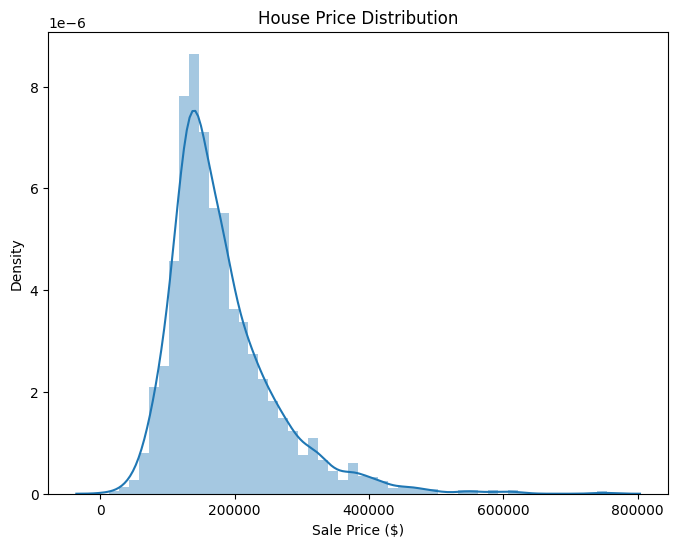

In [9]:
plt.figure(figsize=(8,6))
sns.distplot(df['SalePrice'])
plt.title("House Price Distribution")
plt.xlabel("Sale Price ($)")
plt.show()

The distribution of sale price seems to be right-skewed.

Let's look at predictor variables that are highly correlated with sale price.

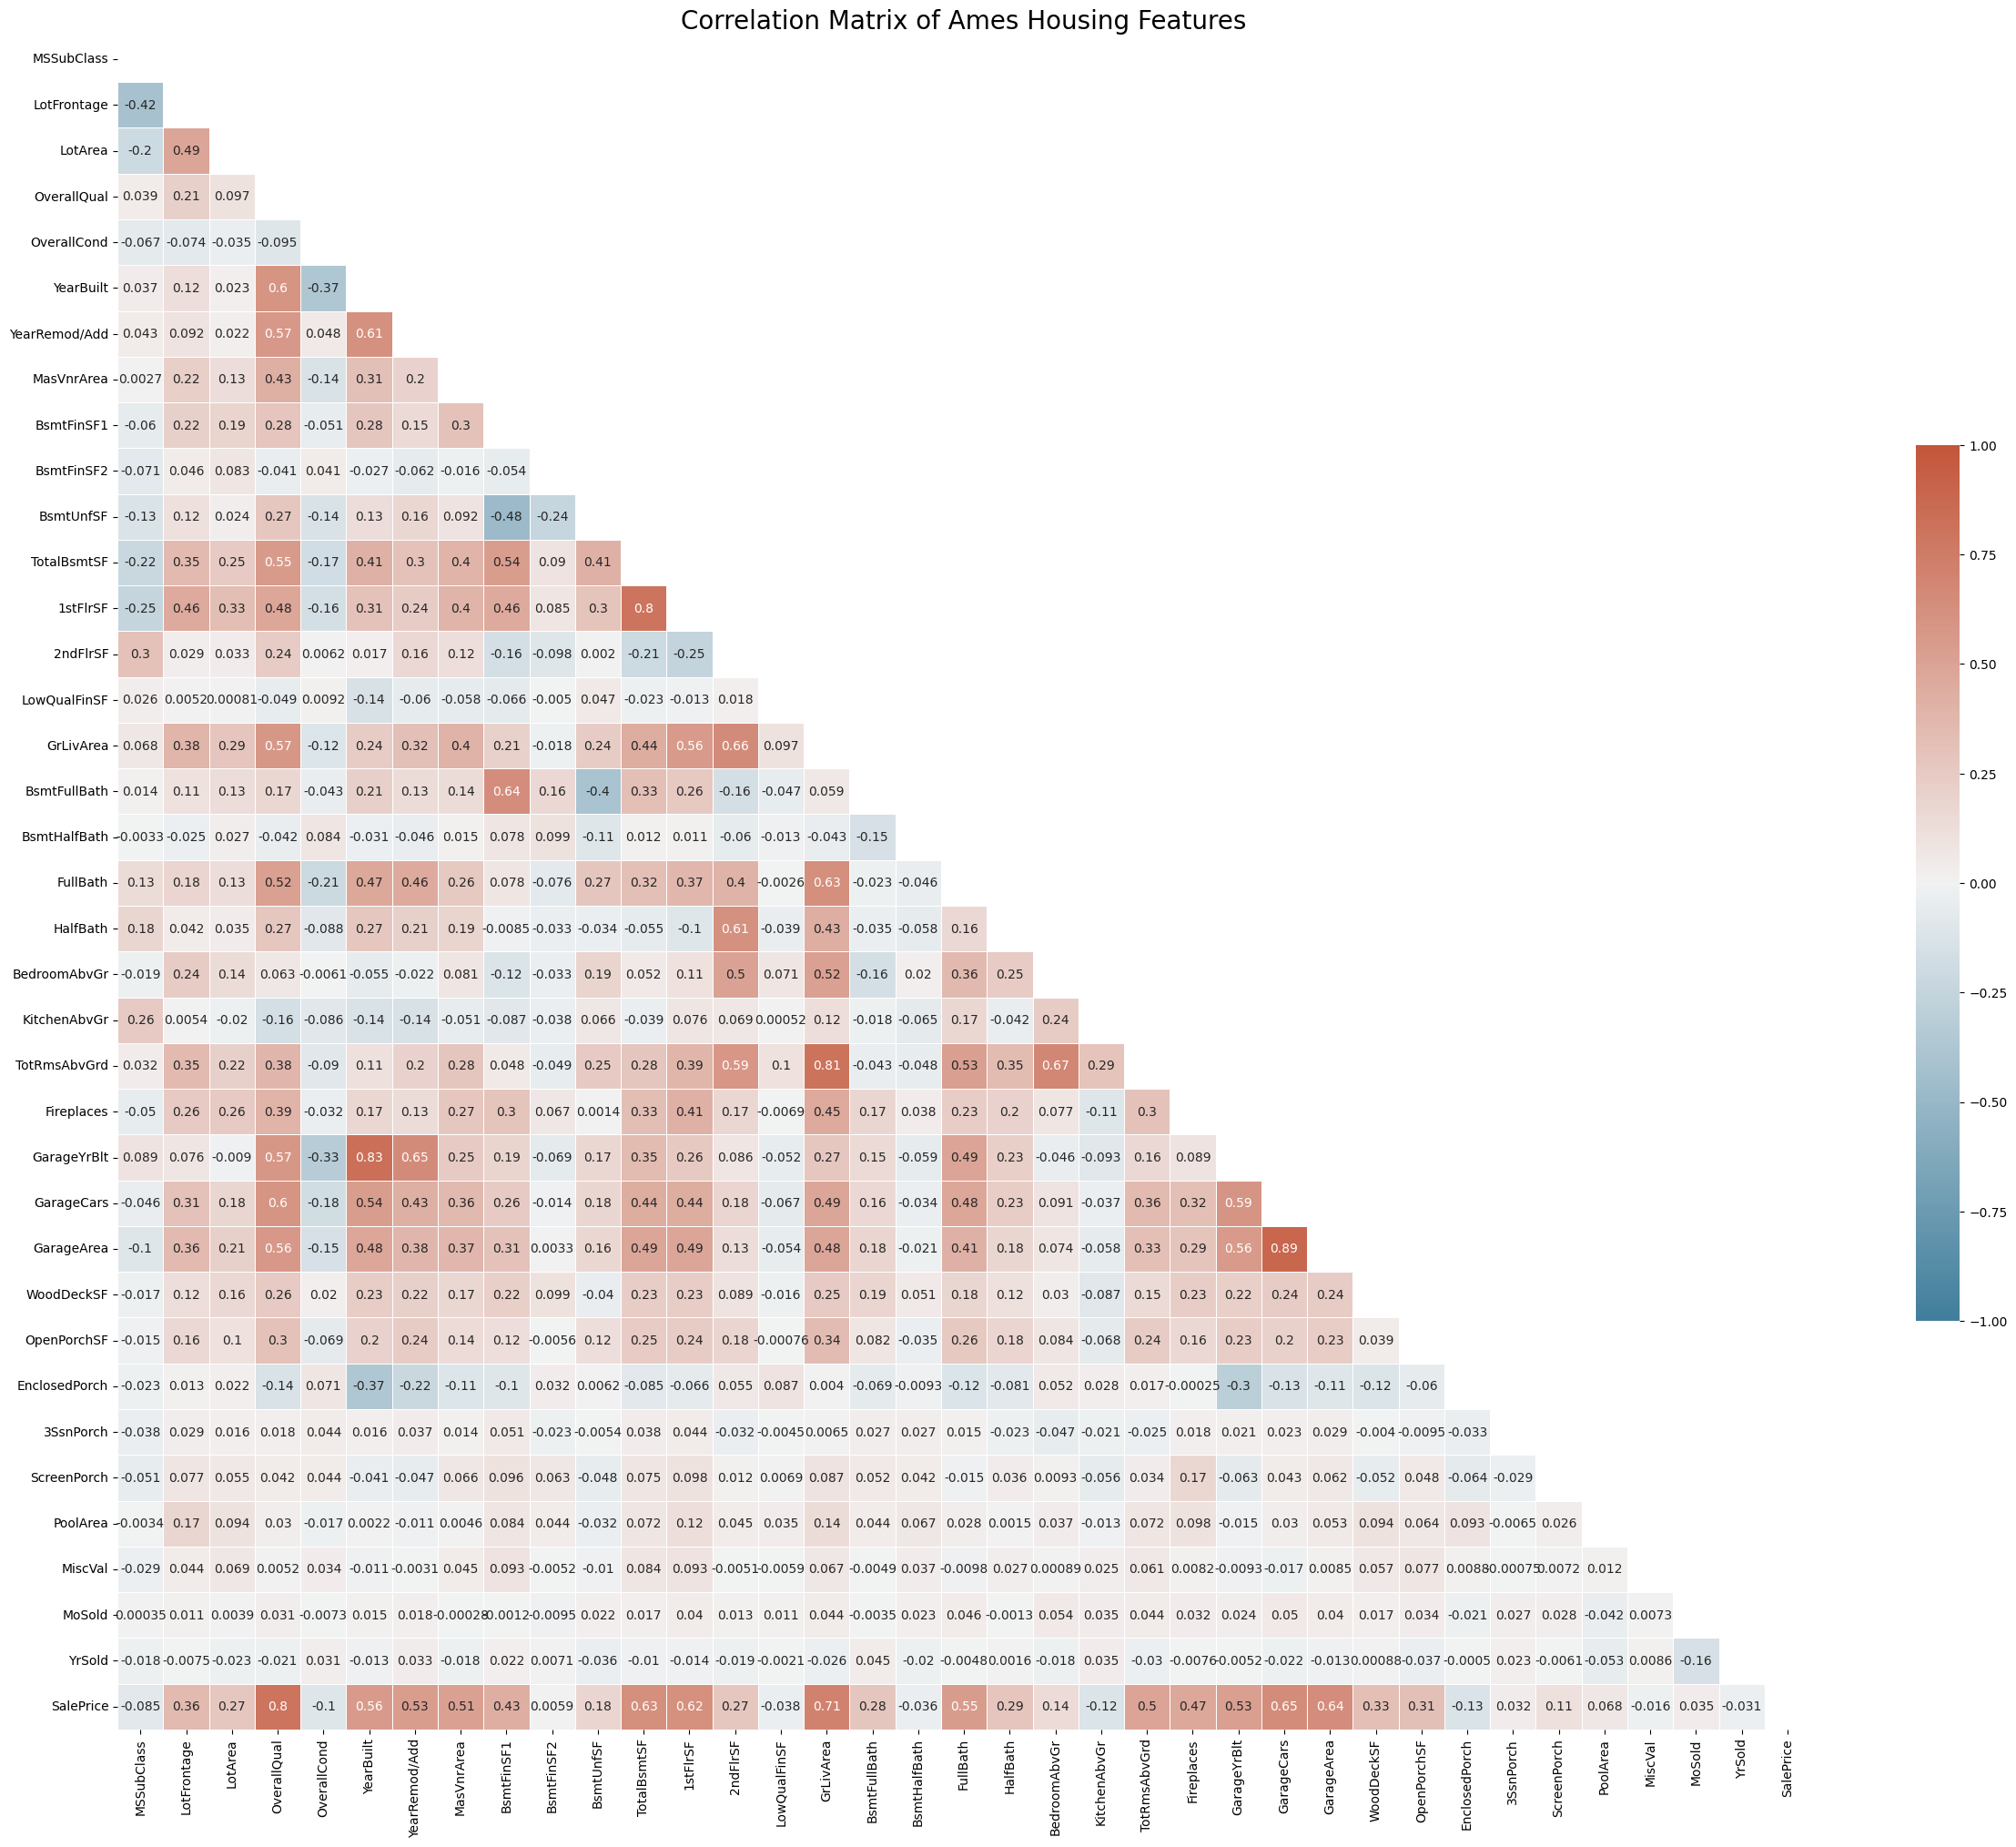

In [10]:
# Select only numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=[np.number])

# Generate the correlation matrix
correlation_matrix = numeric_cols.corr('pearson')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Setting up the matplotlib figure
plt.figure(figsize=(30, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation Matrix of Ames Housing Features", fontsize=20)
plt.show()

According to the figure above, our dataset has multicolliniearity. This means two or more predictor variables are highly correlated. In other words, one predictor variable can be linearly predicted from the others with a substantial degree of accuracy. This redundancy makes it difficult for the model to estimate the relationship between each predictor variable and the target variable (in this case, the Sale Price) independently because it becomes challenging to discern the effect of each predictor variable on the target. Let's see which predictor models are highly correlated with each other.

In [11]:
# Identify all pairs of highly correlated features
highly_corr_pairs = correlation_matrix.where(np.triu(np.abs(correlation_matrix) >= 0.8, k=1)).stack()

# Correlation of each feature with 'SalePrice'
correlation_with_sale_price = numeric_cols.corr()['SalePrice']

# Determine which feature to remove from each highly correlated pair based on lower correlation with 'SalePrice'
features_to_consider = set()
for (feature1, feature2), corr_value in highly_corr_pairs.items():
    print(f"{feature1} and {feature2} are highly correlated")

YearBuilt and GarageYrBlt are highly correlated
TotalBsmtSF and 1stFlrSF are highly correlated
GrLivArea and TotRmsAbvGrd are highly correlated
GarageCars and GarageArea are highly correlated


Transitioning from the correlation matrix, let's zone in on which predictors are most correlated with sale price out of our 79 predictors.

In [12]:
# Find the 10 features most correlated with 'SalePrice'
top_10_correlated_features = correlation_matrix['SalePrice'].sort_values(key=abs, ascending=False).head(11)
top_10_correlated_features

SalePrice        1.000000
OverallQual      0.799262
GrLivArea        0.706780
GarageCars       0.647877
GarageArea       0.640401
TotalBsmtSF      0.632280
1stFlrSF         0.621676
YearBuilt        0.558426
FullBath         0.545604
YearRemod/Add    0.532974
GarageYrBlt      0.526965
Name: SalePrice, dtype: float64

According to the output above, we notice that the overall quality of the house (OverallQual) and the Above Ground Living Area (GrLivArea) both have a strong correlation with the sale price of the house. Let's do some hypothesis testing to further investigate these relationships.

Now we will conduct a Pearson Correlation Test to test the relationship between the Gr Living Area of a house and its Sale Price.

The pearsonr function returns two values: the correlation coefficient and the p-value. The correlation coefficient ranges from -1 to 1, where values closer to -1 or 1 indicate a strong negative or positive relationship, respectively. Values near 0 indicate no linear relationship. The p-value tests the significance of the correlation coefficient.

Our null and alternative hypothesis will be as follows:


*  Null hypothesis (H0): There is no linear relationship between Sale Price and the Above Ground Living Area
* Alternative hypothesis (H1): There is a linear relationship between Sale Price and the Above Ground Living Area

In [13]:
corr_coeff, p_value = pearsonr(df['GrLivArea'], df['SalePrice'])
print(corr_coeff, p_value)

0.7067799209766279 0.0


By conducting a pearson correlation test, we can quantify our results and see if there is actually a strong positive linear relationship between the concerned variables. Our results indicate that the correlation coefficient is 0.7. Since the correlation coefficient is close to 1, we can conclude that there is indeed a strong positive linear relationship between the Above Ground Living Area of the House and its Sale Price. Our results also show that we got a p-value of 0, which is less than the significance level (alpha=0.05). Since our p-value is very low, the probability of observing the data under the assumption of the null hypothesis is very low. This suggests there is strong evidence against our null hypothesis and that there is a strong linear correlation between the Above Ground Living Area and the Sales Price of the House.

The scatterplot confirms the conclusion above

Text(0, 0.5, 'Sale Price ($)')

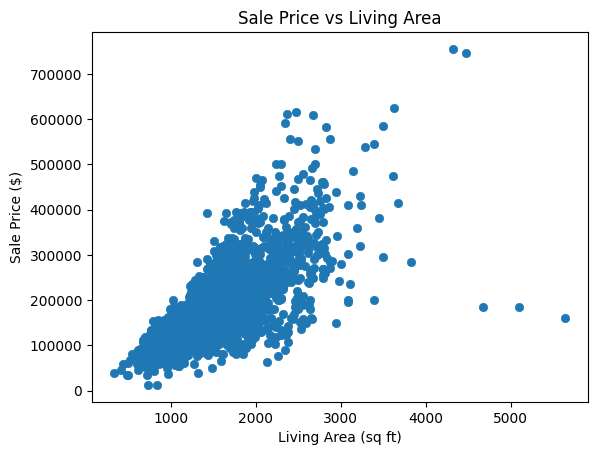

In [14]:
plt.scatter(x=df['GrLivArea'], y=df['SalePrice'], linewidths=0.5)
plt.title('Sale Price vs Living Area')
plt.xlabel("Living Area (sq ft)"); plt.ylabel("Sale Price ($)")

Note: According to the figure above, there are five outliers that we will address during data preprocessing.

Next, we want to actually test and quantify if the overall quality is significantly associated with the sale price. To assess the strength of this association, we can perform an ANOVA test. This is because the Overall Quality is a categorical variable with values from 1 to 10, and we're interested in comparing the means of sale prices across these categories.

ANOVA Test Hypothesis
* Null Hypothesis (H0): The mean sale prices are equal across all levels of Overall Quality
* Alternative Hypothesis (H1): At least one level of Overall Quality has a mean sale price that is different from the others.

In [15]:
# first group the sale prices by the different values of Overall Qual.
groups = []
for quality in sorted(df['OverallQual'].unique()):
    groups.append(df[df['OverallQual'] == quality]['SalePrice'])

# Performing one-way ANOVA test
f_stat, p_value = f_oneway(*groups)

print(f"F-Statistic: {f_stat}, P-value: {p_value}")

F-Statistic: 765.2200842729998, P-value: 0.0


Our results indicate that the F-Statistic value is about 765.22 and the p-value is approximately 0.

The F-statistic is a measure of the ratio of between-group variance to the within-group variance. Our F-Statistic indicates that the the difference in sale prices across the different levels of Overall Quality is much greater than the variance of sale prices within each level of Overall Quality. This suggests a strong effect of house quality on sale prices.

A p-value of 0.0 indicates that the observed data would be highly unlikely under the null hypothesis. Our p-value is less than the significance level. Based on the p-value and a significance level of alpha = 0.05, we have evidence to reject the null hypothesis and conclude that the overall quality of the house has a statistically significant effect on the sale price.

To confirm the above conclusion, we can see that there is a positive correlation between the Overall Quality of the house (1 - 10 rating scale) and its Sale Price. According to the data documentation, overall quality rates the overall material and finish of the house:

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

Generally, as the Overall Quality increases, the Sale Price increases too. The fact that the overall quality rating of the house has a very strong positive correlation with the sale price of the house implies that this variable will be very important when predicting the sale price.

Text(0, 0.5, 'Sale Price ($)')

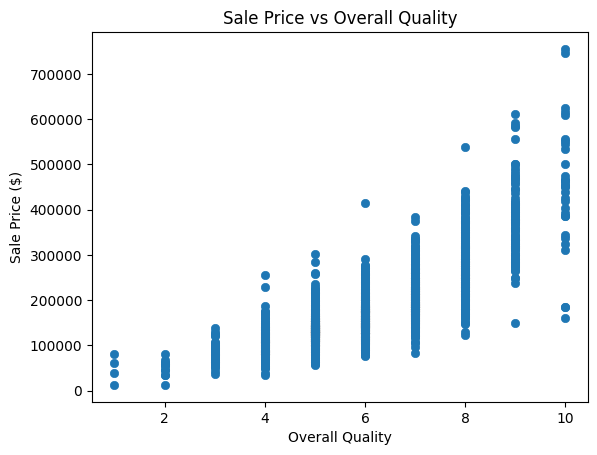

In [16]:
plt.scatter(x=df['OverallQual'], y=df['SalePrice'], linewidths=0.5)
plt.title('Sale Price vs Overall Quality')
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price ($)")

Given our ANOVA test results between SalePrice and Overall Qual (Overall Quality) with a p-value of 0.0, it's clear there's a statistically significant difference in sale prices across different levels of overall quality. Let's proceed with the Tukey's Honestly Significant Difference (HSD) test to conduct a posthoc analysis. This test will help us determine which specific levels of overall quality significantly differ from each other in terms of sale price.

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     1      2   3600.3077    1.0 -75434.8443  82635.4596  False
     1      3   34460.975 0.8905 -38026.6466 106948.5966  False
     1      4  57760.0973 0.2072 -11963.0858 127483.2805  False
     1      5  86027.5164 0.0034  16745.9339 155309.0989   True
     1      6 113405.3183    0.0  44102.5034 182708.1332   True
     1      7 156300.7608    0.0  86957.2901 225644.2315   True
     1      8 222188.5943    0.0 152680.5424 291696.6462   True
     1      9 319611.7664    0.0 249217.5289 390006.0038   True
     1     10 401492.3226    0.0 328054.3492 474930.2959   True
     2      3  30860.6673 0.4471 -13269.3164   74990.651  False
     2      4  54159.7897 0.0006  14734.8935  93584.6858   True
     2      5  82427.2087    0.0  43788.6549 121065.7624   True
     2      6 109805.0106    0.0  71128.

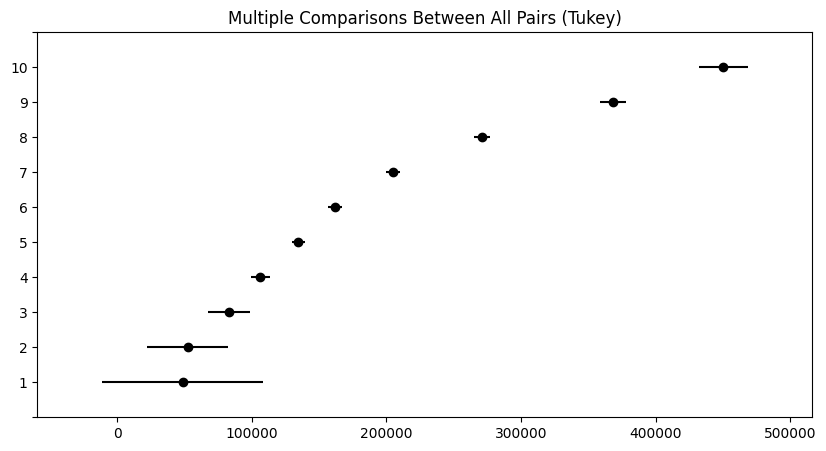

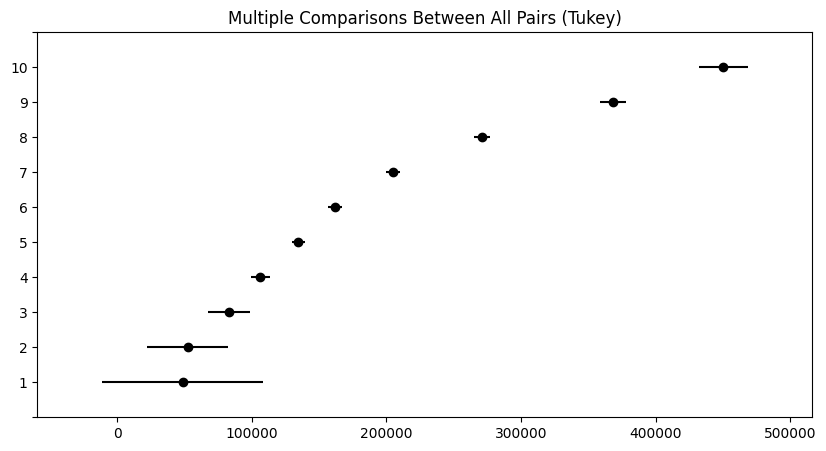

In [17]:
tukey_results = pairwise_tukeyhsd(endog=df['SalePrice'], groups=df['OverallQual'], alpha=0.05)
print(tukey_results)
tukey_results.plot_simultaneous(figsize=(10, 5))    # Adjust the figure size as needed

The Tukey's Honestly Significant Difference (HSD) test results provide detailed comparisons between pairs of Overall Qual levels in terms of their effect on SalePrice.

* group1 and group2: The levels of Overall Qual being compared.

* meandiff: The difference in average SalePrice between the two groups (group2 minus group1).

* p-adj: The adjusted p-value for the comparison. A value below 0.05 typically indicates a statistically significant difference in the average SalePrice between the two levels of Overall Qual.

* lower and upper: The bounds of the 95% confidence interval for the difference in means. If this interval does not include zero, it suggests a significant difference.

* reject: Indicates whether the null hypothesis of no difference should be rejected (True) or not (False).

# Data Cleaning

Let's see how much of our data is missing and which features are missing values.

In [18]:
# Calculate the number and percentage of missing values for each column
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100

# Filter out columns that actually have missing values
missing_data = pd.DataFrame({'Number of Missing Values': missing_values, 'Percentage of Missing Values': missing_percentage})
missing_data = missing_data[missing_data['Number of Missing Values'] > 0].sort_values(by='Number of Missing Values', ascending=False)

missing_data

,Number of Missing Values,Percentage of Missing Values
PoolQC,2917,99.556314
MiscFeature,2824,96.382253
Alley,2732,93.242321
Fence,2358,80.477816
MasVnrType,1775,60.580205
FireplaceQu,1422,48.532423
LotFrontage,490,16.723549
GarageCond,159,5.426621
GarageQual,159,5.426621
GarageFinish,159,5.426621


We have 25 features that have missing values.



If Pool QC is NA, that means the hosue has No Pool

If Misc Feature is NA, that means the house has No Feature

If Alley is NA, that means the house has No Alley

If Fence is NA, that means the house has No Fence

If Fireplace is NA, that means the house has No Fireplace

In [19]:
df['PoolQC'].fillna('No Pool', inplace=True)
df['MiscFeature'].fillna('No Feature', inplace=True)
df['Alley'].fillna('No Alley', inplace=True)
df['Fence'].fillna('No Fence', inplace=True)
df['FireplaceQu'].fillna('No Fireplace', inplace=True)

Lot Frontage is the linear length of street connected to the house. Any missing values indicates that the house is not connected to any street. So fill in missing values with 0 ft of street length

NA values in GarageCars and GarageArea means that the house does not have a garage. So impute missing values with 0

In [20]:
df['LotFrontage'].fillna(0, inplace=True)
df['GarageCars'].fillna(0, inplace=True)
df['GarageArea'].fillna(0, inplace=True)

Impute GarageYrBlt with YearBuilt

In [21]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])

The Electrical column has 1 missing value so use a mode imputation

In [22]:
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

Impute missing values for Mas Vnr Type with None (according to dataset documentation, this means no masonry veneer) and Mas Vnr Area with 0

In [23]:
df['MasVnrArea'].fillna(0, inplace=True)
df['MasVnrType'].fillna("None", inplace=True)

For, Garage Cond, Garage Qual, Garage Finish, and Garage Type, missing values mean that the house lacks a garage. We know 157 houses are without garages. However, there's a discrepancy for two properties where all garage-related columns except for Garage Type are missing values. Garage Type entries for these two properties may be inaccurate, assuming there is no garage. We must specifically update the Garage Type column for these two entries to "No Garage."

In [24]:
df.loc[~pd.isna(df['GarageType']) &
            pd.isna(df['GarageQual']), "GarageType"] = "No Garage"

Impute No Garage into the missing values of all other categorical Garage columns for the other 157 records

In [25]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col].fillna('No Garage', inplace=True)

According to dataset documentation, if Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Qual, or Bsmt Cond is missing, the house has no basement. There are 83 rows where at least one of these columns is NA. Among these rows, there are 3 rows where Bsmt Exposure is null while BsmtFin Type 1, Bsmt Qual, and Bsmt Cond are not null

For these 3 rows, fill in missing values for Bsmt Exposure with No to indicate No Exposure

In [26]:
bsmt_rows_to_update = df[(df['BsmtExposure'].isna()) &
                         (df['BsmtFinType1'].notna()) &
                         (df['BsmtQual'].notna()) &
                         (df['BsmtCond'].notna())]
df.loc[bsmt_rows_to_update.index, 'BsmtExposure'] = 'No'

There is also one row where BsmtFin Type 2 is null while BsmtFin Type 1, Bsmt Qual, and Bsmt Cond are not null. For this row, fill in missing values for BsmtFin Type 2 with Unf to indicate Unfinished

In [27]:
bsmt_type2_row_to_update = df[(df['BsmtFinType2'].isna()) &
                              (df['BsmtFinType1'].notna()) &
                              (df['BsmtQual'].notna()) &
                              (df['BsmtCond'].notna())]
df.loc[bsmt_type2_row_to_update.index, 'BsmtFinType2'] = 'Unf'

Impute missing values for Bsmt Half Bath, Bsmt Full Bath, Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 2, and BsmtFin SF 1 with 0.

In [28]:
for col in ["BsmtHalfBath", "BsmtFullBath", "TotalBsmtSF",
            "BsmtUnfSF", "BsmtFinSF2", "BsmtFinSF1"]:
    df[col].fillna(0, inplace=True)

For the other 80 rows in which Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Qual, or Bsmt Cond is missing, fill in these values with No Basement

In [29]:
for col in ["BsmtExposure", "BsmtFinType2",
            "BsmtFinType1", "BsmtQual", "BsmtCond"]:
    df[col].fillna("No Basement", inplace=True)

Let's ensure there are no more missing values.

In [30]:
df.isna().values.sum()

0

De Cock (2011) states that there are 5 outliers in the dataset specifically in SalePrice vs Living Area. We also noticed this during our EDA.

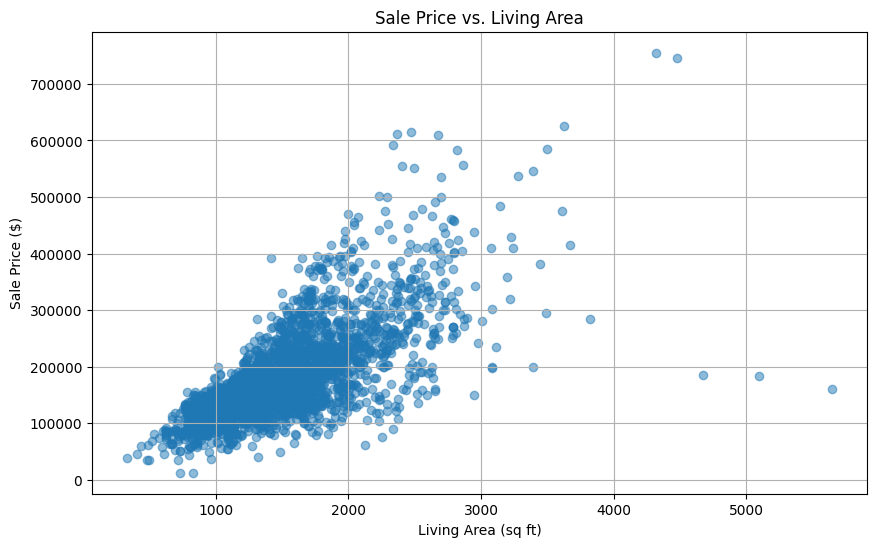

In [31]:
# Plotting SalePrice vs GrLivArea to visualize the outliers
plt.figure(figsize=(10, 6))
plt.scatter(df['GrLivArea'], df['SalePrice'], alpha=0.5)
plt.title('Sale Price vs. Living Area')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.grid(True)
plt.show()

We can see these 5 outliers. They are values where Living Area exceeds 4000. So let's remove them and reset row indices because we are deleting rows

In [32]:
df = df[df["GrLivArea"] < 4000]
df.reset_index(drop=True, inplace=True)

# Feature Engineering

We can derive some features from our existing ones to increase model performance.

Let's start off with some numerical features

* TotalSqFeet can sum up the total square footage of the basement (TotalBsmtSF), first floor (1stFlrSF), and second floor (2ndFlrSF). By combining these areas, we provide a single comprehensive measure of the size of the house, which can be more informative than individual area measurements for predicting house prices.
* TotalBathrooms can calculate the total number of bathrooms, including half bathrooms (weighted as 0.5) across the house. Bathrooms are a significant factor in home valuation. This combined metric provides a clear, overall picture of the bathroom amenities in a home, which is typically more relevant than counting full and half bathrooms separately.
* HouseAge can be calculated as the difference between the year the house was sold (YrSold) and the year it was built (YearBuilt). Older houses might have different valuation characteristics due to factors like architectural style, wear and tear, and historical value. This feature helps capture that aspect.
* IsNew can be a binary feature that indicates if the house was sold in the same year it was built. Newly built houses might be more attractive due to modern designs and materials, and this feature helps to isolate such properties.
* SqFtPerRoom could represent the average square footage per room by dividing the gross living area (GrLivArea) by the total number of rooms above grade plus bathrooms and kitchens. It provides a normalized measure of room spaciousness.
* TotalHomeQuality can be the sum of the overall quality (OverallQual) and overall condition (OverallCond) of the house. This score can give a quick insight into the overall status and quality of the house.
* HighQualSF can sum the square footage of the first and second floors. Higher quality living area typically found on main floors can be more desirable than basement or lower quality space.

In [33]:
df['TotalSqFeet'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['TotalBathrooms'] = df['FullBath'] + df['BsmtFullBath'] + 0.5 * (df['HalfBath'] + df['BsmtHalfBath'])
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['IsNew'] = np.where(df['YrSold'] == df['YearBuilt'], 1, 0)
df['SqFtPerRoom'] = df['GrLivArea'] / (df['TotRmsAbvGrd'] + df['FullBath'] + df['HalfBath'] + df['KitchenAbvGr'])
df['TotalHomeQuality'] = df['OverallQual'] + df['OverallCond']
df['HighQualSF'] = df['1stFlrSF'] + df['2ndFlrSF']

When creating new features, it's a good practice to drop original columns that may now be redundant or highly correlated with the new features to avoid multicollinearity. This prevents overcomplicating the model and preventing overfitting in our future regression models.

In [34]:
# List of columns to drop after creating new features
columns_to_drop = [
    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',     # Areas included in TotalSqFeet and HighQualSF
    'FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath',  # Components of TotalBathrooms
    'YrSold',    # Used in calculating HouseAge and IsNew, YearBuilt is kept for potential other uses
    'OverallQual', 'OverallCond',  # Combined into TotalHomeQuality
    'GrLivArea', 'TotRmsAbvGrd', 'KitchenAbvGr'  # Used in calculating SqFtPerRoom
]

# Dropping the columns
df.drop(columns=columns_to_drop, inplace=True)

Now let's handle categorical features

* Let's convert numeric categorical variables to strings. Such fields are MSSubClass, YrSold, and MoSold. These fields represent categories. Converting these to strings prevents any mistaken interpretation as ordinal or interval data potentially misleading models.
* We will perform label encoding on various fields like Alley, BsmtQual, etc. Many machine learning models require input features to be numeric. Label encoding transforms categorical labels into a numeric format while preserving the order.
* We will perform one-hot encoding. This will converts categorical variable entries into a series of binary (0 or 1) columns. This is necessary for models that only accept numerical input and ensures that the model interprets the categorical data correctly without assuming ordinality.

In [35]:
# Handling categorical variables that are numeric
to_factor_cols = ['MSSubClass', 'MoSold']
for col in to_factor_cols:
    df[col] = df[col].apply(str)

# Apply Label Encoding to ordinal categorical columns
label_encoding_cols = [
    "Alley", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
    "BsmtQual", "ExterCond", "ExterQual", "FireplaceQu", "Functional",
    "GarageCond", "GarageQual", "HeatingQC", "KitchenQual", "LandSlope",
    "LotShape", "PavedDrive", "PoolQC", "Street", "Utilities"
]
label_encoder = LabelEncoder()
for col in label_encoding_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Creating dummy variables from categorical features
df = pd.get_dummies(df)

Some of our features may be skewed.

* A distribution is highly skewed if |skewness| > 1
* A distribution is moderately skewed if |skewness| > 0.5
* A distribution is approximately symetrix if |skewness| < 0.5

Our problem is a regression task, which relies on a normal distribution assumption. Let's identify skewed features and normalize them. Recall from EDA, sale price is skewed, so let's start off with that.

In [36]:
# Define a function to plot the distribution of any feature
def normality_plot(feature, feature_name):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Distribution Plot
    sns.distplot(feature, fit=norm, ax=axes[0])
    axes[0].set_title(f'{feature_name} Distribution Plot')
    axes[0].set_xlabel(feature_name)  # Setting the x-axis title
    axes[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Scientific notation

    # Probability Plot
    stats.probplot(feature, dist="norm", plot=axes[1])
    axes[1].set_title(f'Probability Plot')
    axes[1].set_xlabel('Theoretical quantiles')  # Setting the x-axis title
    axes[1].get_lines()[1].set_color('red')  # Ensuring the regression line is red

    plt.tight_layout()
    plt.show()

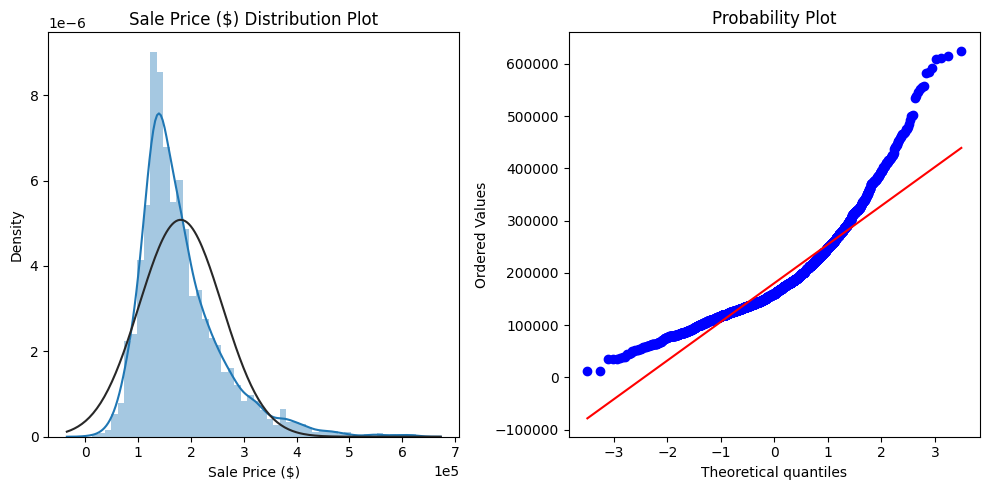

In [37]:
normality_plot(df['SalePrice'], 'Sale Price ($)')

Let's analyze the plots above. The left one displays the distribution of the SalePrice. The histogram (blue bars) represents the frequency of data points within specific intervals. On top of the histogram is a kernel density estimate (KDE) curve (blue line) that estimates the probability density function of the variable. The black curve represents the normal distribution curve, which is a theoretical distribution that the data should follow if it were perfectly normal. By comparing the histogram and KDE to the normal curve, we can visually assess how close the data comes to a normal distribution. Deviations from the normal curve suggest deviations from normality. The plot on the right is a Q-Q plot. It compares the quantiles of the actual data against the quantiles of a theoretical normal distribution. The data points (blue dots) are plotted against the expected values if the data were normally distributed. The red line represents where the points would lie if the data were perfectly normal. This plot is a more direct method to check for normality. If the data points closely follow the red line, the data are likely normal. Our Q-Q plot shows significant deviations from this line. This suggests our sale price might be skewed or have outliers.

Let's see if any other features are skewed.

In [38]:
skewness = df.skew().sort_values(ascending=False)
skewed_cols = skewness[abs(skewness) > 0.5].index
skewed_cols.tolist()

['Heating_Floor',
 'Exterior1st_PreCast',
 'RoofMatl_Membran',
 'Exterior2nd_PreCast',
 'RoofMatl_Metal',
 'MSSubClass_150',
 'RoofMatl_Roll',
 'Neighborhood_Landmrk',
 'MiscFeature_TenC',
 'Exterior1st_ImStucc',
 'Condition2_RRAe',
 'Exterior2nd_Other',
 'Electrical_Mix',
 'SaleType_VWD',
 'MasVnrType_CBlock',
 'Condition2_RRAn',
 'Neighborhood_GrnHill',
 'MSZoning_I (all)',
 'Exterior1st_Stone',
 'MSZoning_A (agr)',
 'Exterior1st_CBlock',
 'Exterior1st_AsphShn',
 'Condition2_RRNn',
 'Heating_OthW',
 'Utilities',
 'Exterior2nd_CBlock',
 'Condition2_PosN',
 'Condition2_PosA',
 'MiscFeature_Othr',
 'Exterior2nd_AsphShn',
 'Condition2_Artery',
 'MiscFeature_Gar2',
 'SaleType_Con',
 'Foundation_Wood',
 'RoofStyle_Shed',
 'MiscVal',
 'Exterior2nd_Stone',
 'Condition1_RRNe',
 'RoofMatl_WdShngl',
 'Heating_Wall',
 'MSSubClass_40',
 'Exterior1st_BrkComm',
 'SaleType_Oth',
 'Electrical_FuseP',
 'HouseStyle_2.5Fin',
 'Neighborhood_Greens',
 'SaleType_ConLw',
 'PoolArea',
 'RoofMatl_WdShake',
 '

Let's normalize the skewed features with a log transformation.

In [39]:
for i in skewed_cols:
    df[i] = np.log(1 + df[i])

The skewness in sale price should be fixed now having a more normal distribution

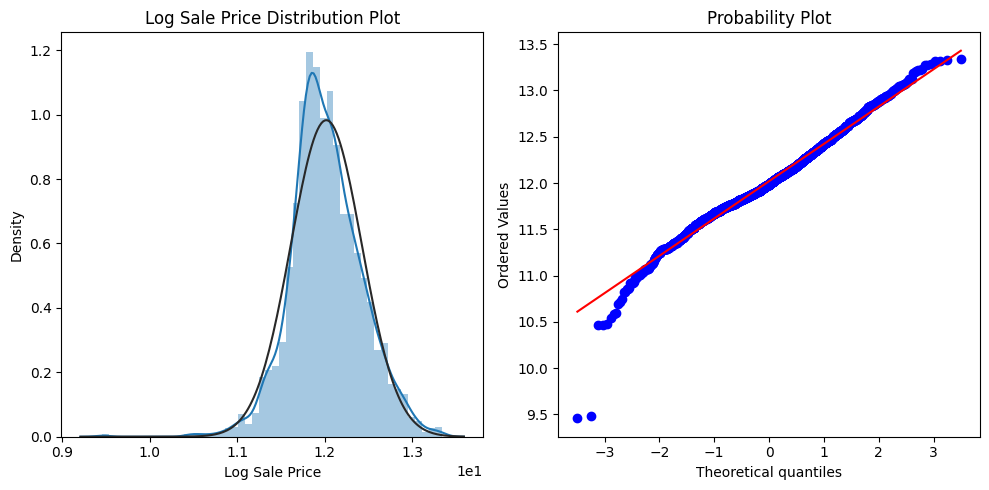

In [40]:
normality_plot(df['SalePrice'], 'Log Sale Price')

# Primary Analysis

Let's split our dataset into a training set to fit our models and a test set to score the performance of our models.

In [41]:
X = df.drop('SalePrice', axis=1)  # Removes the target column from the feature set
y = df['SalePrice']  # Only the target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**What is Regression?**

Regression is a statistical method used in machine learning to model and analyze the relationships between variables. It is useful when the goal is to predict a continuous outcome based on one or more predictor variables. In the context of predicting house prices, regression allows us to establish a relationship between the house price (the dependent variable) and various independent variables or features (like the size of the house, the number of bedrooms, location, etc.).

**Why Use Regression for Predicting House Prices?**

We are using regression in predicting house prices because it provides quantitative estimates. This is crucial because house prices are continuous and can vary widely based on numerous factors. Regression models can incorporate these factors to make predictions, helping us understand the impact of different features on the price.

**What is K-Fold Cross-Validation?**

K-Fold Cross-Validation is a technique used to evaluate the performance of a model. In this method, the dataset is divided into k consecutive folds. Each fold acts as the test set exactly once while the remaining k-1 folds form the training set. The process is repeated k times, with each of the folds used exactly once as the test data. This technique helps in reducing bias as each data point gets to be in a test set exactly once and gets to be in a training set k-1 times.

**Why Use K-Fold Cross-Validation?**

K-Fold Cross-Validation is useful in scenarios like predicting house prices, where the dataset might not be very large. It maximizes the amount of data that is used for training the model and makes sure the model can generalize to new, unseen data. It helps prevent overfitting and underfitting by validating the model’s performance on different subsets of the data.

**What is RMSE?**

Root Mean Squared Error (RMSE) is a standard way to measure the error of a model in predicting quantitative data. It is particularly common in regression analysis to measure the difference between values predicted by a model and the actual observed values.

**How RMSE Works and Its Usefulness**

RMSE is calculated as the square root of the mean of the square of all of the error. We square the residuals, average those squares, and then take the square root. This ensures errors are positive, larger errors are emphasized, and the units are the same as the units of the predicted value. RMSE is a good measure to determine how accurately the model predicts the response, and it is the most an important measure for fit because our main purpose of the model is prediction.

**Note on RMSLE (Root Mean Squared Logarithmic Error)**

Since we have previously performed a log transformation on the 'SalePrice' in our dataset to handle its skewed distribution, the error metric becomes the Root Mean Squared Logarithmic Error (RMSLE) instead of RMSE.

Let's define a function that takes a model, trains it, performs cross validation, and gives us the "score."

In [42]:
def rmsle(model):
    # use cross validation
    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    return np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kf)).mean()

We will be testing out 5 regression models to figure out how to best predict sale price.

**Linear Regressor**

Linear Regression attempts to model the relationship between a scalar dependent variable and one or more independent variables by fitting a linear equation to observed data. The equation for a linear regression line is `y = b0 + b1*x1 + b2*x2 + ... + bn*xn`, where:
- `y` is the predicted value,
- `b0` is the intercept,
- `b1, b2, ..., bn` are the coefficients,
- `x1, x2, ..., xn` are the features.

**Support Vector Regressor (SVR)**

Support Vector Regression (SVR) is a machine learning model that comes from applying the Support Vector Machines (SVM) to regression problems. SVM is used for classification tasks, where the goal is to find the best boundary that separates classes of data points. SVR modifies this approach to predict a continuous variable. SVR works by fitting the best line (in a linear SVR) or curve (in a non-linear SVR) within a threshold value. The goal is to keep as many data points as possible within this boundary while minimizing the errors.
- Margin of Tolerance (ε): SVR has the concept of an ε-insensitivity zone. Predictions made within this ε range from the actual values are not considered errors. This helps in reducing the model's sensitivity to slight variations in the training set.
- Kernel Trick: For non-linear data, SVR uses a kernel function to transform the data into a higher-dimensional space where the data can be linearly separated. Common kernels include linear, polynomial, and radial basis function (RBF).

**Decision Tree Regressor**

A Decision Tree Regressor constructs a tree-like model of decisions and their possible outcomes. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches, each representing values for the attribute tested. A leaf node represents a prediction on the numerical target.

**Random Forest Regressor**

Random Forest is an ensemble method that builds upon multiple decision trees to improve prediction accuracy. It reduces the risk of overfitting by averaging multiple decision trees, each trained on different parts of the same training set. It creates multiple trees (forest) and merges them together to get a more stable prediction. Each tree gives a prediction, and the higher the number of trees voting on a prediction, the more it becomes the final prediction.

**KNN Regressor**

K-Nearest Neighbors Regressor is a type of instance-based learning where all computation is done at classification. The output is a property value for the object. This value is the average of the values of its k closest instances.

Let's initialize our models, train them, and score them.

In [43]:
scores = []
models = {
    'Linear Regressor': LinearRegression(),
    'Support Vector Regressor': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'KNN Regressor': KNeighborsRegressor()
}

for _, model in models.items():
    scores.append(rmsle(model))

score_table = pd.DataFrame(list(models.keys()), columns = ['Regressors'])
score_table['RMSLE'] = scores

Let's train our models, test them on our allocated test set, and record those scores.

In [44]:
test_scores = []

for _, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmsle = np.sqrt(mean_squared_error(y_test, y_pred))
    test_scores.append(rmsle)

test_score_table = pd.DataFrame(list(models.keys()), columns = ['Regressors'])
test_score_table['RMSLE'] = test_scores

# Visualization

Let's create a function to plot model scores

In [45]:
def plot_model_scores(table):
    plt.figure(figsize=(12, 8))
    barplot = sns.barplot(x='Regressors', y='RMSLE', data=table)
    plt.title('Root Mean Squared Logarithmic Error vs Regressor Models')
    plt.xlabel('Regressors', fontsize=12)
    plt.ylabel('Root Mean Squared Logarithmic Error', fontsize=12)
    plt.xticks(rotation=45)

    # Loop over the bars in the barplot to add text annotations
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.3f'),  # Format the label to display 3 decimal places
                        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the text to be at the center of each bar
                        ha='center', va='center',  # Center alignment for the text
                        xytext=(0, 9),  # The text offset that lifts the text higher above the bar
                        textcoords='offset points')

    plt.show()

Let's compare the cross validation scores of each model side by side visually.

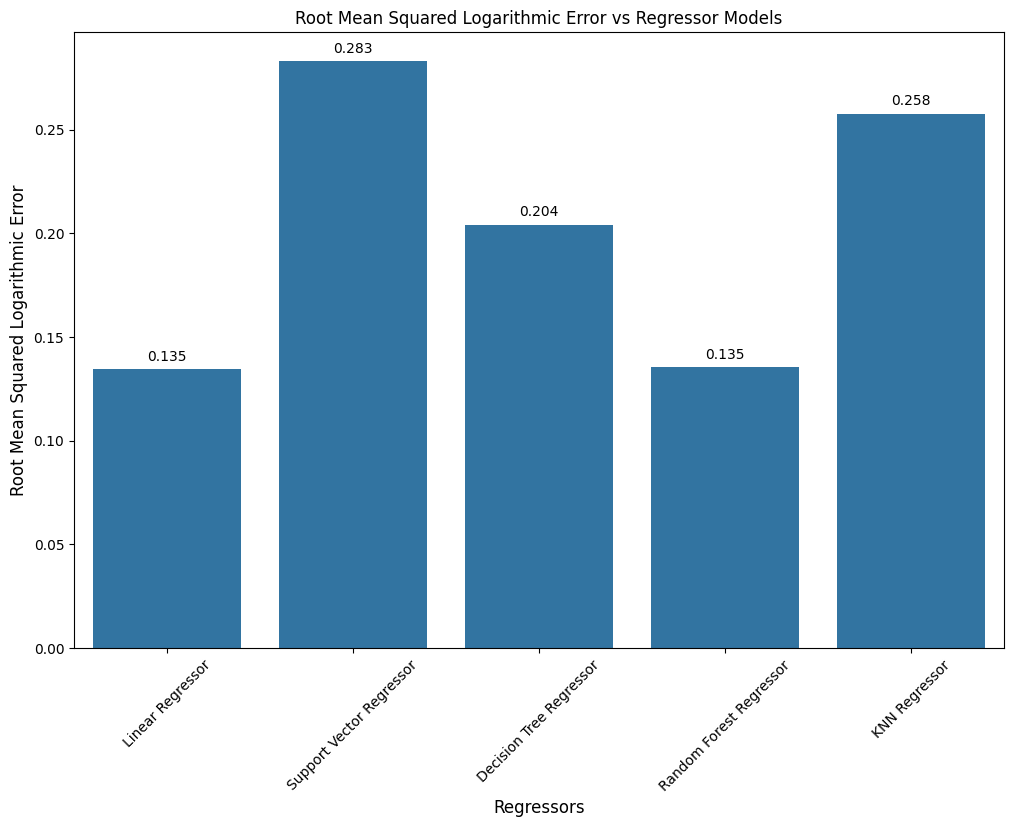

In [46]:
plot_model_scores(score_table)

The bar chart above compares the Root Mean Squared Logarithmic Error (RMSLE) across our various regression models used in predictive analysis. On the Y-axis, RMSLE measures the differences between actual and predicted values during cross-validation training.

Notably, both Linear Regressor and the Random Forest Regressor have the lowest RMSLE at 0.135, suggesting they perform significantly well. In contrast, the Support Vector Regressor shows the highest error with an RMSLE of 0.283, indicating less predictive accuracy due to the model's sensitivity to hyperparameters or data characteristics.

Let's compare the test scores of each model side by side visually.

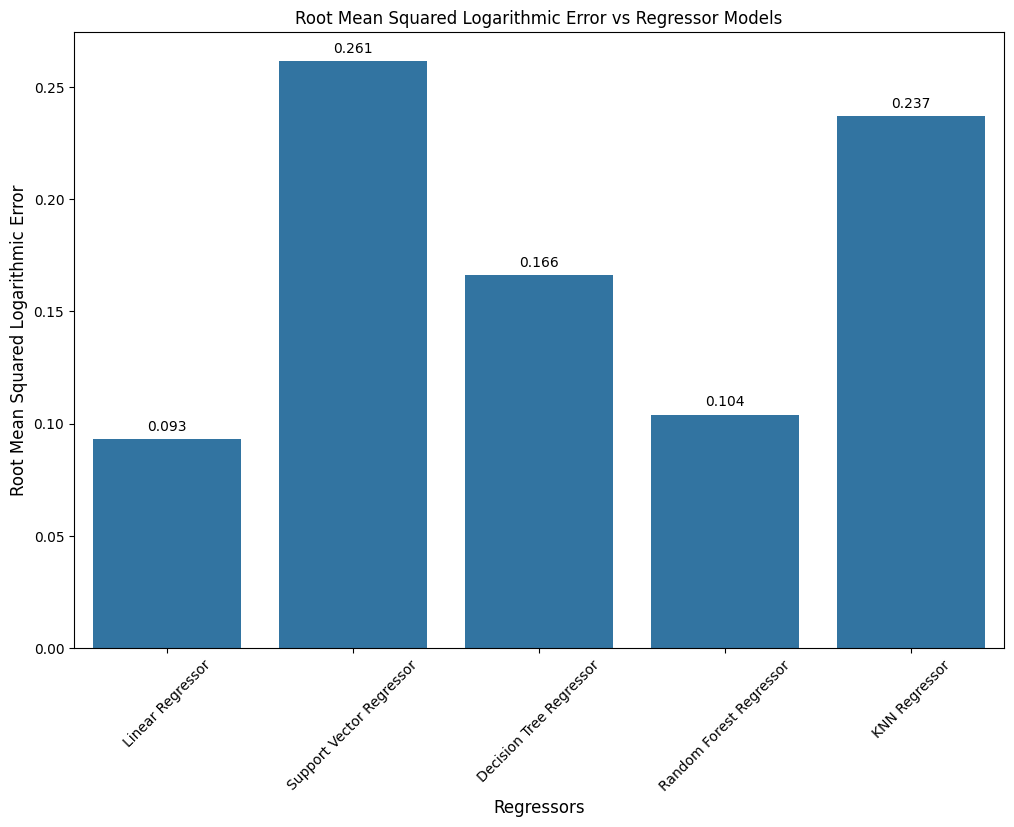

In [47]:
plot_model_scores(test_score_table)

According to the test results, linear regression performs the best with the lowest RMSLE.

# Insights and Conclusions

There is a lot to digest by the end of this project. As visualized, with the lowest validation and testing RMSLE, the linear regressor model outperforms all other regression models. This suggests that when it comes to forecasting housing prices using past data, the linear regression algorithm comes out on top for accuracy. It's able to understand the complex connections within the data through methods like stochastic gradient descent, resulting in better predictions. Following closely behind is the Random Forest Regressor, which excels by blending numerous decision trees to make solid predictions about house prices.

Overall, The low RMSLE indicates that the chosen features for predicting housing prices are both relevant and informative. These features account for crucial factors like location, size, amenities, and neighborhood characteristics, all of which play significant roles in determining housing prices. The low value also shows that the model performs well when faced with new, unseen data, a crucial aspect for its practical use. This suggests that the model's predictions aren't heavily swayed by random fluctuations or unusual data points during training. It gives confidence that the model can reliably forecast prices for new housing listings or properties not originally in the training set.

To conclude, we determined that our housing dataset contains redundant features that will overcomplicate the model with their co-dependencies such as: Year Built and Garage Year built; total basement square footage and 1st floor sq footage; living area and total rooms above ground; garage capacity in cars and garage area in sq footage. We also identified some features that are highly correlated with our target variable such as: overall quality, living area, garage area in capacity, garage area in sq footage, total basement area, 1st floor area, year build, number of full bathrooms, year remodeled, and the year the garage was built. Combining this info, we engineered new features that eliminate multicollinearity while capturing the strongest correlations between sale price and predictor variables. We used these features to build regression models, from which we decided the best model. We learned what features are the best predictors of sale price and how to properly harness them, while developing a prediction tool to assist buyers, sellers, brokers, and policymakers as mentioned in our introduction.